In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(brightness=.3, contrast=.3, saturation=.3, hue=.1)

rand_rotate = transforms.RandomRotation(3, resample=False, expand=False, center=None)

/home/beans/anaconda3/envs/py37/lib/python3.7/site-packages/torchvision/transforms/transforms.py:1201: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [3]:
from PIL import Image
import numpy as np

img = np.array(Image.open('assets/img/hotdog.jpeg'))

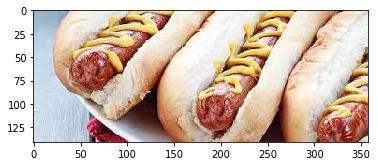

In [55]:
plt.imshow(img)

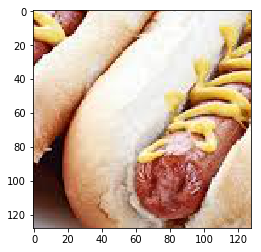

In [56]:
img_ = torch.from_numpy(img).permute(2,0,1)
img_ = transforms.CenterCrop(128)(img_)
plt.imshow(img_.permute(1,2,0).numpy())

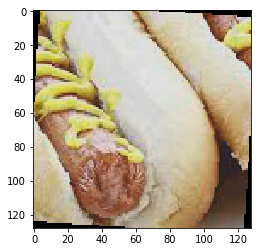

In [66]:
img_1 = transforms.ColorJitter(brightness=.4, contrast=.2, saturation=.5, hue=.1)(img_)
img_1 = transforms.RandomRotation(10)(img_1)
img_1 = transforms.RandomHorizontalFlip(1)(img_1)
plt.imshow(img_1.permute(1,2,0).numpy())

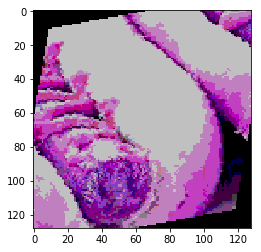

In [76]:
img_2 = transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=.5)(img_)
img_2 = transforms.RandomRotation(25)(img_2)
img_2 = transforms.RandomHorizontalFlip(1)(img_2)
img_2 = transforms.functional.affine(img_2, angle=0, translate=[0,0], scale=1, shear=10)
img_2 = transforms.functional.posterize(img_2, 2)
plt.imshow(img_2.permute(1,2,0).numpy())

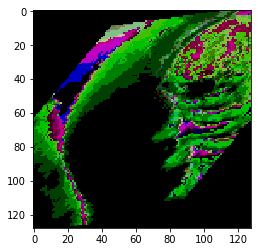

In [81]:
img_3 = transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=.5)(img_)
img_3 = transforms.RandomRotation(25)(img_3)
img_3 = transforms.RandomVerticalFlip(1)(img_3)
img_3 = transforms.functional.solarize(img_3, .1)
img_3 = transforms.functional.posterize(img_3, 2)
img_3 = transforms.functional.affine(img_3, angle=0, translate=[0,0], scale=1, shear=40)
plt.imshow(img_3.permute(1,2,0).numpy())

In [90]:
hotdogs = torch.stack([img_, img_1, img_2, img_3], dim=0).float().to("cuda")
hotdogs /= 255.
hotdogs.shape

torch.Size([4, 3, 128, 128])

In [91]:

from IPython.core.display import Image as JupyterImage
from torchvision.utils import save_image

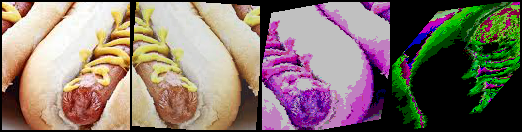

In [93]:
save_image(hotdogs, 'hotdogs.png')
JupyterImage('hotdogs.png')

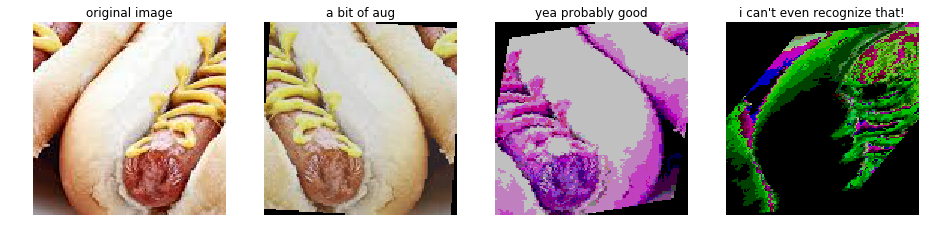

In [98]:

# Plot
a = [img_, img_1, img_2, img_3]
plt.figure(figsize=(20, 10))
plt.tight_layout()

titles=['original image', 'a bit of aug', "yea probably good", "i can't even recognize that!"]

for i in range(len(a)):
    ax = plt.subplot(1,5, i+1)
    img = a[i].permute(1,2,0).cpu().numpy()
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")